In [1]:
import os

In [2]:
if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

In [4]:
from thinkdsp import read_wave
wave = read_wave('410298__inspectorj__voice-request-26b-algeria-will-rise-again-serious.wav')

Скачаем образец(в данном случае это некоторая цитата с разными интонациями)

In [5]:
wave.make_audio()

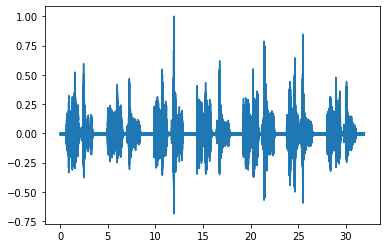

In [6]:
wave.plot()

In [7]:
our_segment = wave.segment(start = 11.8, duration = 0.2)


Выделим из него фрагмент с постоянной высотой. В данном случае, это часть в 0.2 секунды.

In [8]:
our_segment.make_audio()

Распечатанный сегмент

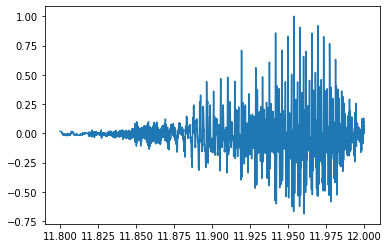

In [9]:
our_segment.plot()

Сегмент спектра

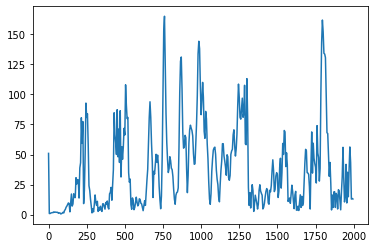

In [17]:
spectrum = our_segment.make_spectrum()
spectrum.plot(high=2000)

In [18]:
spectrum.peaks()[0:10]

[(165.10938867993923, 760.0),
 (161.94254259658712, 1795.0),
 (152.92238357550232, 755.0),
 (152.08209008961526, 1800.0),
 (144.2787474338824, 985.0),
 (143.1282594721564, 1790.0),
 (138.15853483073275, 990.0),
 (134.28430017603432, 1805.0),
 (133.74569330614807, 980.0),
 (133.6522281515983, 1810.0)]

[(161.94254259658712, 1795.0),
 (152.08209008961526, 1800.0),
 (143.1282594721564, 1790.0),
 (134.28430017603432, 1805.0),
 (133.6522281515983, 1810.0),
 (130.67606020778277, 1815.0),
 (113.17347132117054, 1300.0),
 (108.59650381940602, 1245.0),
 (107.63718349383453, 1285.0),
 (100.67644697445982, 1785.0)]

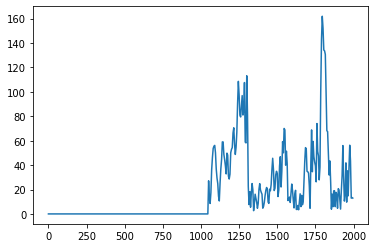

In [20]:
spectrum = our_segment.make_spectrum()
new_spectrum = spectrum

new_spectrum.high_pass(1050)
spectrum.plot(high=2000)
new_spectrum.peaks()[:10]

После использования high_pass в звуке появился шум, похожий на те, что есть в старых устройствах связи

In [21]:
new_spectrum.make_wave().make_audio()

In [22]:
new_spectrum.plot()

In [23]:
spectrum = our_segment.make_spectrum()
new_spectrum = spectrum

new_spectrum.low_pass(1000)
spectrum.plot(high=1000)
new_spectrum.peaks()[:10]


[(165.10938867993923, 760.0),
 (152.92238357550232, 755.0),
 (144.2787474338824, 985.0),
 (138.15853483073275, 990.0),
 (133.74569330614807, 980.0),
 (131.16233300681688, 870.0),
 (127.57225093966804, 865.0),
 (125.3691723012561, 765.0),
 (108.0395034808351, 505.0),
 (107.75358470463603, 995.0)]

После использования low_pass у звук стал похож на звук под водой.

In [24]:
new_spectrum.make_wave().make_audio()

In [25]:
from thinkdsp import SinSignal
from thinkdsp import CosSignal

In [37]:
signal = (SinSignal(freq=300, amp=0.2) + CosSignal(freq=200, amp=0.2) + CosSignal(freq=100, amp=0.5))
signal.plot()

In [38]:
another_wave = signal.make_wave()
another_wave.apodize()
another_wave.make_audio()

Кратность основных частот равна 100

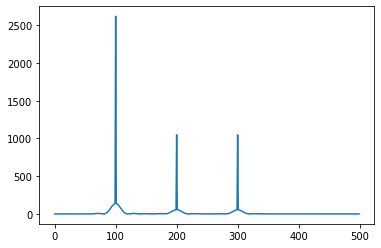

In [40]:
another_spectrum = another_wave.make_spectrum()
another_spectrum.plot(high=500)

Добавим сигнал, который не согласуется с кратностью. Звук стал отчетливо выше.

In [43]:
signal += SinSignal(freq=658, amp = 0.7)
signal.make_wave().make_audio() 

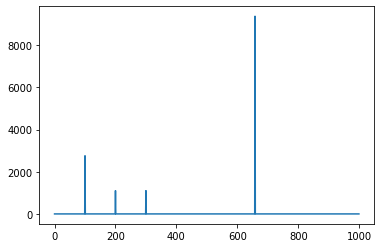

In [44]:
another_spectrum_1 = signal.make_wave().make_spectrum()
another_spectrum_1.plot(high=1000)

Функция strecth, которая берет wave и коэффициент изменения, при этом ускоряет/замедляет сигнал.

In [150]:
def stretch(wave, factor):
    wave.ts *= factor
    wave.framerate /= factor

In [153]:
wave_test = read_wave('410298__inspectorj__voice-request-26b-algeria-will-rise-again-serious.wav')

stretch(wave_test, 0.4)
wave_test.make_audio()